In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, dot

class TF:
    def __init__(self, n, d):
        self.index = n
        self.thickness = d
        
    def matrix(self, w):
        delta = 2*pi*(self.index)*(self.thickness)/w
        ita = self.index
        element = pd.DataFrame(
            {'e1':cos(delta), 'e2':1j/ita*sin(delta), 'e3':1j*ita*sin(delta), 'e4':cos(delta)}
        )
        matrix = np.reshape(element.values.reshape(1,-1), (np.size(w), 2, 2))
        return matrix
    
def Matrix_dot(layer_up, layer_bot): 
    w, _, _ = np.shape(layer_up)
    eq = [dot(layer_up[i], layer_bot[i]) for i in range(w)]
    return eq

def Eq_TF_Matrix(design):
    eq_matrix = design.pop()
    for i, layer in enumerate(design):
        eq_matrix = Matrix_dot(design[-i-1], eq_matrix)
    return eq_matrix

def Eq_admittance(eq, ns):
    d, _, _ = np.shape(eq)
    eq_y = dot(eq, np.array([[1], [ns]])) 
    Eq_y = pd.DataFrame(np.reshape(eq_y, (d, 2)), columns = ['B','C'])
    Y = Eq_y['C']/Eq_y['B']
    return Y.values.reshape(d, 1)
    
def Reflectance(eq, ns, n0):
    eq_Y = Eq_admittance(eq, ns)
    r = (n0-eq_Y)/(n0+eq_Y)
    R = np.reshape(r*r.conjugate(), np.size(eq_Y))
    return np.real(R)

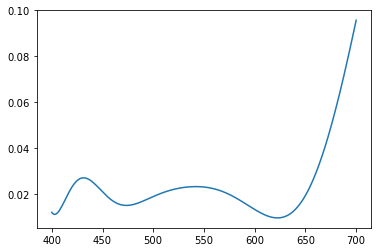

In [13]:
n_s = 1.77
n_L = 1.7
n_H = 2.02
n_air = 1
target_w = np.linspace(400, 700, 500)
L1 = TF(n_H, 29.15).matrix(target_w)
L2 = TF(n_L, 15.92).matrix(target_w)
L3 = TF(n_H, 73.06).matrix(target_w)
L4 = TF(n_L, 78.79).matrix(target_w)
L5 = TF(n_H, 2.14).matrix(target_w)
L6 = TF(n_L, 60.31).matrix(target_w)
L7 = TF(n_H, 70.35).matrix(target_w)
L8 = TF(n_L, 32.78).matrix(target_w)
L9 = TF(n_H, 14.89).matrix(target_w)
L10 = TF(n_L, 82.14).matrix(target_w)
L11 = TF(n_H, 63.44).matrix(target_w)
L12 = TF(n_L, 72.34).matrix(target_w)
coating = [L12, L11, L10, L9, L8, L7, L6, L5, L4, L3, L2, L1]
tf_matrix = Eq_TF_Matrix(coating)
R = Reflectance(tf_matrix, n_s, n_air)
S = {'wavelength':target_w, 'reflectance': R}
s = pd.DataFrame(S)
plt.plot(target_w, R)
plt.show()

In [15]:
s.to_csv('R.csv')

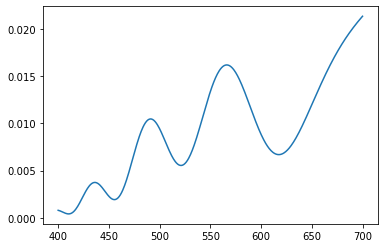

In [100]:
n_SiO2 = 1.46
n_SiON8 = 2.004
n_SiON5 = 2.022
target_w = np.linspace(400, 700, 500)
L1 = TF(n_SiO2, 18.32).matrix(target_w)
L2 = TF(n_SiON8, 11.2).matrix(target_w)
L3 = TF(n_SiO2, 49.2).matrix(target_w)
L4 = TF(n_SiON8, 24.52).matrix(target_w)
L5 = TF(n_SiO2, 27.85).matrix(target_w)
L6 = TF(n_SiON8, 38.3).matrix(target_w)
L7 = TF(n_SiO2, 6.66).matrix(target_w)
L8 = TF(n_SiON8, 494.25).matrix(target_w)
L9 = TF(n_SiO2, 9.84).matrix(target_w)
L10 = TF(n_SiON5, 46.32).matrix(target_w)
L11 = TF(n_SiO2, 16.05).matrix(target_w)
L12 = TF(n_SiON5, 150.77).matrix(target_w)
L13 = TF(n_SiO2, 78.41).matrix(target_w)
DX_coating = [L13, L12, L11, L10, L9, L8, L7, L6, L5, L4, L3, L2, L1]
tf_matrix = Eq_TF_Matrix(DX_coating)
substrate = 1.5
air = 1

R = Reflectance(tf_matrix, substrate, air)
plt.plot(target_w, R)
plt.show()

In [99]:
import os 
path = r'C:\Users\hsuyoway\Desktop\Yoway\GG3 with DX coating'
os.chdir(path)
os.listdir()
file1 = pd.read_csv('s1_up_R.csv')
file2 = pd.read_csv('s2_up_R.csv')
file3 = pd.read_csv('s3_up_R.csv')
file4 = pd.read_csv('s4_up_R.csv')
file5 = pd.read_csv('s1_down_R.csv')
file6 = pd.read_csv('s2_down_R.csv')
file7 = pd.read_csv('s3_down_R.csv')
file8 = pd.read_csv('s4_down_R.csv')

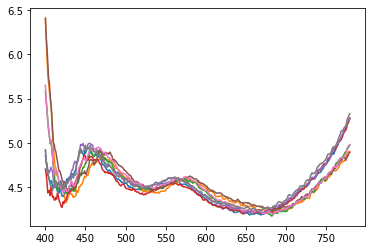

In [98]:
plt.plot(file1['nm'], file1['SCAN'])
plt.plot(file2['nm'], file2['SCAN'])
plt.plot(file3['nm'], file3['SCAN'])
plt.plot(file4['nm'], file4['SCAN'])
plt.plot(file5['nm'], file5['SCAN'])
plt.plot(file6['nm'], file6['SCAN'])
plt.plot(file7['nm'], file7['SCAN'])
plt.plot(file8['nm'], file8['SCAN'])
plt.show()